# EHealth 705

## Python Tutorial: Two-Sample Hypothesis Tests

###  TA: Shirin Shahabinejad : [shahas8@mcmaster.ca](mailto:shahas8@mcmaster.ca)

## Table of Contents
1. [two-sample hypothesis tests concepts](#Concepts)
2. [Implementing two-sample Z](#Ztest)
3. [Implementing two-sample t-tests](#Ttest)
5. [Practical exercise: Conduct a hypothesis test on health data](#Practical_exercise)
4. [Reviewing and interpreting test results](#TestResult)
6. [Q&A and Troubleshooting](#QA-and-Troubleshooting)
7. [Assignment](#Assignment)



#### Date : Mar  7th, 2024


#### Dataset
- **Insurance Dataset for Practical Exercises**:
  - [Insurance Dataset on Kaggle](https://www.kaggle.com/datasets/mirichoi0218/insurance/data)
  
  
  
#### Explanation  
  
  
  
- Age :- This is an integer indicating the age of the primary beneficiary (excluding those above 64 years, since they are generally covered by the government).
- Sex :- This is the policy holder's gender, either male or female.
- BMI :- This is the body mass index (BMI), which provides a sense of how over or under-weight a person is relative to their height. BMI is equal to weight (in kilograms) divided by height (in meters) squared. An ideal BMI is within the range of 18.5 to 24.9.
- Children :- This is an integer indicating the number of children / dependents covered by the insurance plan.
- Smoker :- This is yes or no depending on whether the insured regularly smokes tobacco.
- Region :- This is the beneficiary's place of residence in the U.S., divided into four geographic regions - northeast, southeast, southwest, or northwest.
- Charges​ :- Individual medical costs billed to health insurance

In [11]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from scipy import stats



# Load the dataset
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Two-Way Hypothesis testing concepts <a id="Concepts"></a>

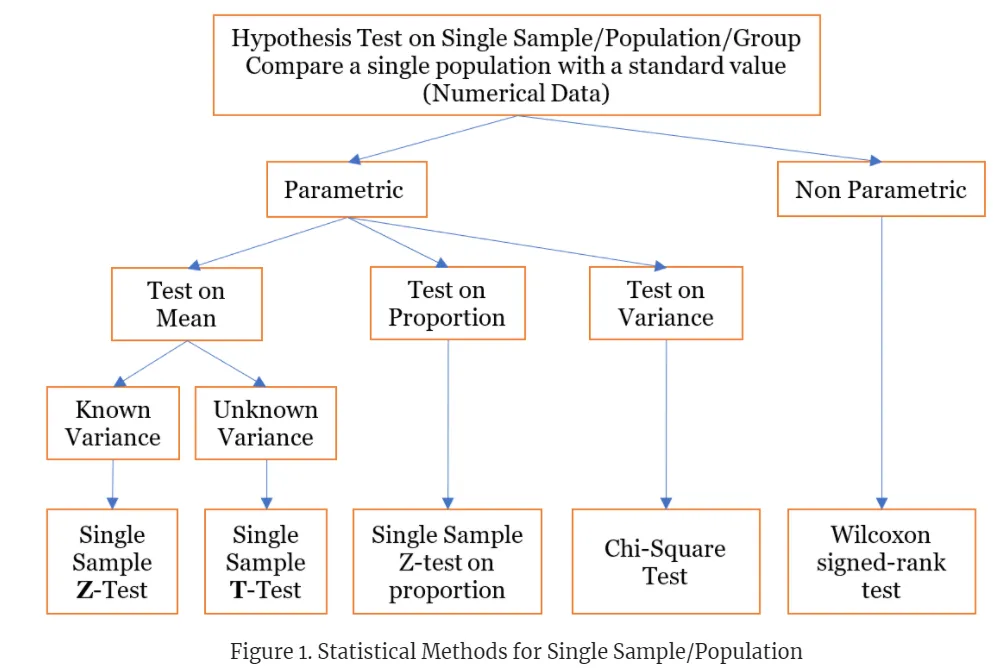

Two-sample hypothesis tests are statistical tests used to compare the means or proportions of two independent groups to determine if there is a significant difference between them. These tests are fundamental in research and data analysis, allowing us to draw conclusions about the relationships between variables across different populations or conditions. 

- Null Hypothesis $\left(H_0\right)$ : The assumption that there is no difference between the means or proportions of the two groups.
- Alternative Hypothesis ( $H_A$ or $H_1$ ): The assumption that there is a difference between the means or proportions of the two groups.
- Type I Error: Incorrectly rejecting the null hypothesis when it is true.
- Type II Error: Incorrectly failing to reject the null hypothesis when the alternative hypothesis is true.




- P-value: The probability of observing the test results under the null hypothesis. A small p-value (typically $\leq 0.05$ ) indicates strong evidence against the null hypothesis.
- Test Statistic: A value calculated from sample data that is used to evaluate the plausibility of th null hypothesis.
- Confidence Interval: A range of values derived from the sample data that is likely to contain the population parameter with a certain level of confidence (e.g., 95\%).

Types of Two-Sample Hypothesis Tests
1. Two-Sample Z-test: Used when comparing the means of two groups and the population variances are known and the sample size is large $(n>30)$.
2. Two-Sample T-test: There are two variants of this test, used when the population variances are unknown:

- Independent samples t-test: Compares the means of two independent or unrelated groups on the same continuous, normally distributed variable.
- Paired samples t-test: Compares the means of two related groups. This can be the same group at two different times or two groups matched or paired in some way.
3. Two-Sample Proportion Z-test: Used to compare the proportions between two groups.

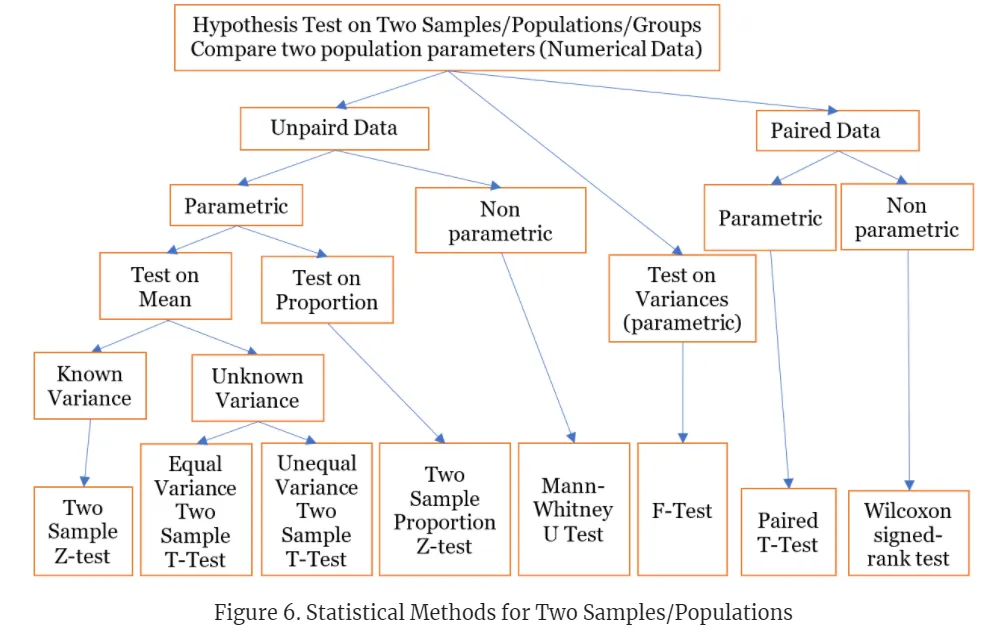

#### TYPE I &  II Error


Type 1 Error: Reject HO when it is true
- The incorrect rejection of a true null hypothesis, called a false positive.
- We think the new procedure introduced as part of process improvement has increased productivity but in long run the productivity remains same as it was before the procedure was introduced
- While preparing to model loan status, you find strong link between income and loan status in the sample data and believe it to be true in population while it is not so
- Significance level $(\alpha)$ or Type 1 error rate: is the probability of making this type of error I ( $P$ value)
- This $\mathrm{P}$ value is usually set to 0.05 as a standard. This translates to $5 \%$ chance of incorrectly rejecting $\mathrm{HO}$

Type 2 error:Failing to reject $\mathrm{HO}$ when it is false
- The incorrect failure of rejecting a false null hypothesis, called a false negative.
- We think the new procedure introduced as part of process improvement has not had any effect but if we had used it long enough we would have noticed the productivity actually increased compare to before the procedure was introduced
- While preparing to model loan status, we do not find strong link between income and loan status in the sample data and believe there is no relation between them in population while a larger sample would have shown the relation
- The value $\beta$ is the probability of a type 2 error or type 2 error rate


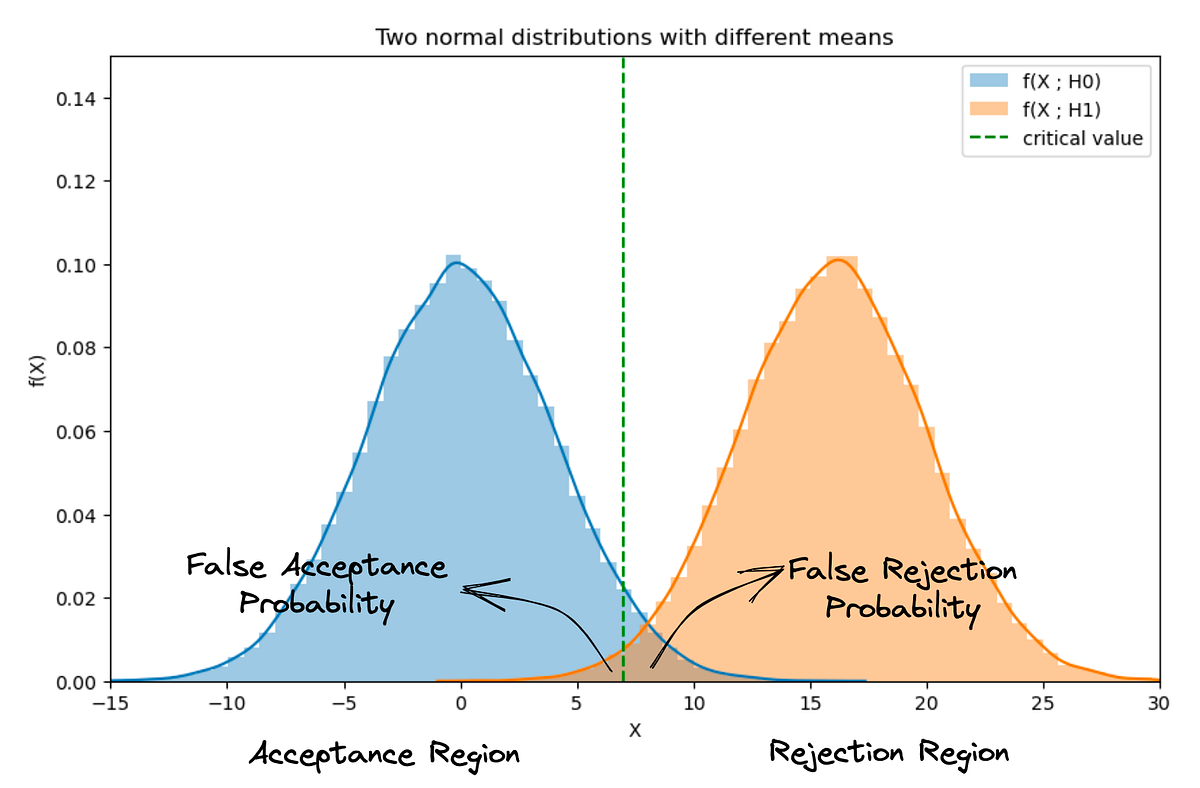


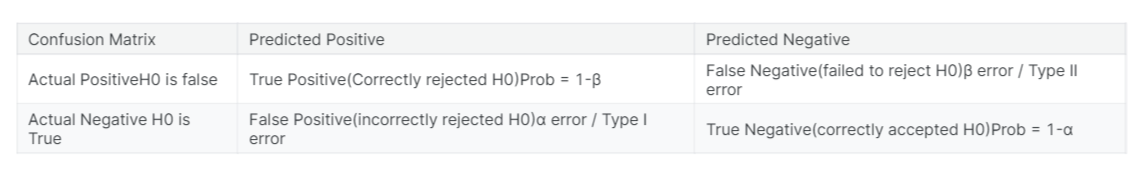



The probability a test will reject H0 when it is supposed to. The estimated probability (power of test) is a function of sample size, variability, level of significance, and the difference between the null and alternative hypotheses.

**Power: 1−β: probability of correctly rejecting H0 when it is fails**

### Critical regions and critical values


To answer this question, we need to introduce the concept of a critical region for the test statistic $X$. The critical region of the test corresponds to those values of $X$ that would lead us to reject the null hypothesis (which is why the critical region is also sometimes called the rejection region). How do we find this critical region? Well, let's consider what we know:
- $X$ should be very big or very small in order to reject the null hypothesis.
- If the null hypothesis is true, the sampling distribution of $X$ is Binomial $(0.5, N)$.
- If $\alpha=.05$, the critical region must cover $5 \%$ of this sampling distribution.

It's important to make sure you understand this last point: the critical region corresponds to those values of $X$ for which we would reject the null hypothesis, and the sampling distribution in question describes the probability that we would obtain a particular value of $X$ if the null hypothesis were actually true. Now, let's suppose that we chose a critical region that covers $20 \%$ of the sampling distribution, and suppose that the null hypothesis is actually true. What would be the probability of incorrectly rejecting the null? The answer is of course $20 \%$. And therefore, we would have built a test that had an $\alpha$ level of 0.2 . If we want $\alpha=.05$, the critical region is only allowed to cover $5 \%$ of the sampling distribution of our test statistic.

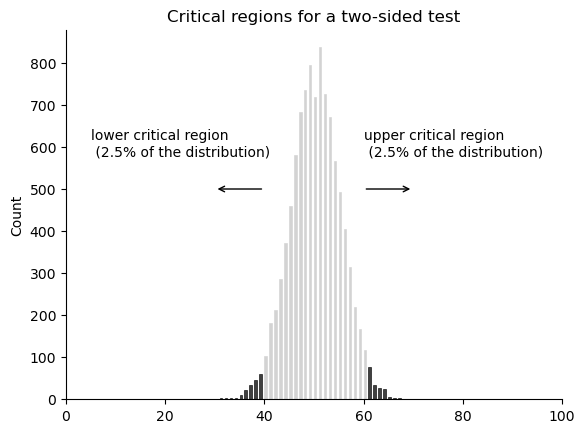

In [1]:
from myst_nb import glue
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns

# sample from a binomial distribution
data = random.binomial(n=100, p=.5, size=10000)

# plot distribution and color critical region
ax = sns.histplot(data, bins=20,binwidth=.5, color="black")
ax.set_title("Critical regions for a two-sided test")
ax.annotate("", xy=(40, 500), xytext=(30, 500), arrowprops=dict(arrowstyle="<-"))
ax.annotate("lower critical region \n (2.5% of the distribution)", xy=(40, 600), xytext=(5, 580))
ax.annotate("", xy=(70, 500), xytext=(60, 500), arrowprops=dict(arrowstyle="->"))
ax.annotate("upper critical region \n (2.5% of the distribution)", xy=(70, 500), xytext=(60, 580))
ax.set(xlim=(0,100))
for p in ax.patches:
    if p.get_x() >= 40:
        if p.get_x() <= 60:
            p.set_color("lightgrey")


sns.despine()

As it turns out, those three things uniquely solve the problem: our critical region consists of the most extreme values, known as the tails of the distribution. This is illustrated in
fig-esp-critical . As it turns out, if we want $\alpha=.05$, then our critical regions correspond to $X \leq 40$ and $X \geq 60$ . That is, if the number of people saying "true" is between 41 and 59, then we should retain the null hypothesis. If the number is between 0 to 40 or between 60 to 100 , then we should reject the null hypothesis. The numbers 40 and 60 are often referred to as the critical values, since they define the edges of the critical region.

At this point, our hypothesis test is essentially complete: (1) we choose an $\alpha$ level (e.g., $\alpha=.05$, (2) come up with some test statistic (e.g., $X$ ) that does a good job (in some meaningful sense) of comparing $H_0$ to $H_1$, (3) figure out the sampling distribution of the test statistic on the assumption that the null hypothesis is true (in this case, binomial) and then (4) calculate the critical region that produces an appropriate $\alpha$ level (0-40 and 60-100). All that we have to do now is calculate the value of the test statistic for the real data (e.g., $X=62$ ) and then compare it to the critical values to make our decision. Since 62 is greater than the critical value of 60 , we would reject the null hypothesis. Or, to phrase it slightly differently, we say that the test has produced a significant result.



### OneSided Test

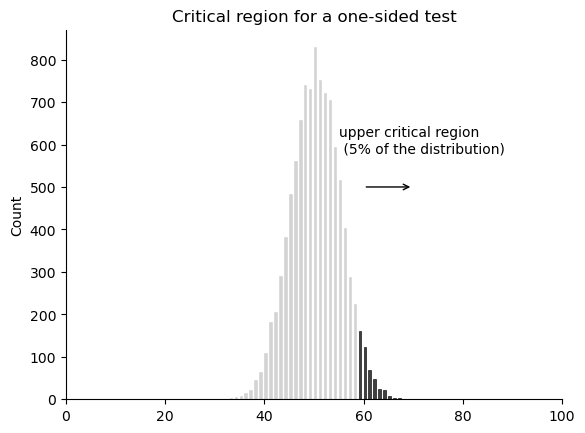

In [14]:
from myst_nb import glue
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns

# sample from a binomial distribution
data = random.binomial(n=100, p=.5, size=10000)

# plot distribution and color critical region
ax = sns.histplot(data, bins=20,binwidth=.5, color="black")
ax.set_title("Critical region for a one-sided test")

#ax.annotate("", xy=(40, 500), xytext=(30, 500), arrowprops=dict(arrowstyle="<-"))
#ax.annotate("lower critical region \n (2.5% of the distribution)", xy=(40, 600), xytext=(22, 580))
ax.annotate("", xy=(70, 500), xytext=(60, 500), arrowprops=dict(arrowstyle="->"))
ax.annotate("upper critical region \n (5% of the distribution)", xy=(70, 500), xytext=(55, 580))
ax.set(xlim=(0,100))
for p in ax.patches:
        if p.get_x() <= 58:
            p.set_color("lightgrey")


sns.despine()

# Implementing Two-sample Z <a id="Ztest"></a>

Objective
The goal is to evaluate the effectiveness of two different training programs (referred to as New and Old) by comparing the mean performance scores of participants from each program.

Hypotheses
- Null Hypothesis $\left(H_0\right)$ : There is no difference in mean performance scores between the participants of the New and Old training programs. Mathematically, it can be expressed as $\mu_{\text {new }}-\mu_{\text {old }}=0$.
- Alternative Hypothesis $\left(H_1\right.$ ): There is a significant difference in mean performance scores between the participants of the New and Old training programs. Mathematically, it can be expressed as
$$
\mu_{\text {new }}-\mu_{\text {old }} \neq 0
$$



Performing the Two-Sample Z-Test
The Z-statistic is calculated using the formula:
$$
Z=\frac{\left(\bar{x}_1-\bar{x}_2\right)}{\sqrt{\frac{\sigma_1^2}{n_1}+\frac{\sigma_2^2}{n_2}}}
$$
where $\bar{x}_1$ and $\bar{x}_2$ are the sample means, $\sigma_1^2$ and $\sigma_2^2$ are the population variances, and $n_1$ and $n_2$ are the sample sizes.

In [3]:

import numpy as np
from scipy.stats import norm

# Set seed for reproducibility
np.random.seed(42)

# Parameters for the new training group
mean_new = 102
std_new = 18
n_new = 60

# Parameters for the old training group
mean_old = 98
std_old = 20
n_old = 55

# Generate sample data
scores_new = np.random.normal(mean_new, std_new, n_new)
scores_old = np.random.normal(mean_old, std_old, n_old)


# Calculate sample means
mean1 = np.mean(scores_new)
mean2 = np.mean(scores_old)

print(mean1)
print(mean2)

# Known population standard deviations
std1 = std_new
std2 = std_old

# Calculate the Z-statistic
pooled_std = np.sqrt((std1**2 / n_new) + (std2**2 / n_old))
Z = (mean1 - mean2) / pooled_std

# Calculate the p-value
p_value = 2 * (1 - norm.cdf(np.abs(Z)))  # Two-tailed test

# Display results
print(f"Z-statistic: {Z:.2f}")
print(f"P-value: {p_value:.4f}")



# Significance level
alpha = 0.05

# Decision
if p_value < alpha:
    print("Reject the null hypothesis - there is a significant difference between the groups.")
else:
    print("Fail to reject the null hypothesis - there is no significant difference between the groups.")


99.21621570473117
97.55857490738192
Z-statistic: 0.47
P-value: 0.6415
Fail to reject the null hypothesis - there is no significant difference between the groups.


# Implementing Two-sample T <a id="Ttest"></a>



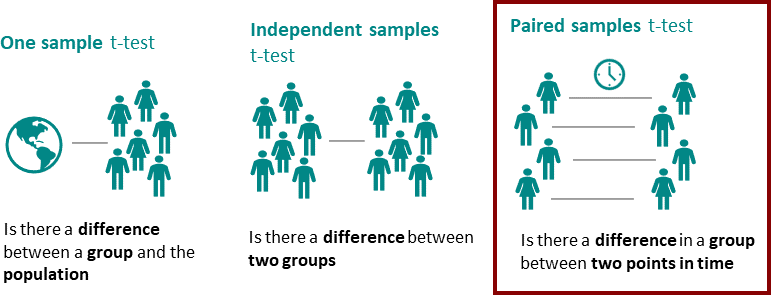

### Scenario 1: Independent t-test
**Objective** 

Determine if there is a significant difference in the average ages of individuals from two different regions, Minnesota and Wisconsin, based on sampled data.


This scenario uses an independent t-test to compare the mean ages of two independent samples: individuals from Minnesota and Wisconsin. The null hypothesis is that there is no difference between the mean ages of the two populations. A p-value less than 0.05 would lead us to reject the null hypothesis, suggesting a significant difference in the average ages.

In [5]:
np.random.seed(6)

population_ages1 = stats.poisson.rvs(loc=18, mu=35, size=150000)
population_ages2 = stats.poisson.rvs(loc=18, mu=10, size=100000)
population_ages = np.concatenate((population_ages1, population_ages2))

minnesota_ages1 = stats.poisson.rvs(loc=18, mu=30, size=30)
minnesota_ages2 = stats.poisson.rvs(loc=18, mu=10, size=20)
minnesota_ages = np.concatenate((minnesota_ages1, minnesota_ages2))

print( "Population: ",population_ages.mean() )
print( "Minnesota: ",minnesota_ages.mean() )

np.random.seed(12)
wisconsin_ages1 = stats.poisson.rvs(loc=18, mu=30, size=30)
wisconsin_ages2 = stats.poisson.rvs(loc=18, mu=10, size=20)
wisconsin_ages = np.concatenate((wisconsin_ages1, wisconsin_ages2))

print( "Wisconsin: ",wisconsin_ages.mean() )

Population:  43.000112
Minnesota:  39.26
Wisconsin:  40.1


In [6]:
# Perform the two-sample t-test
t_statistic, p_value = stats.ttest_ind(a=minnesota_ages, b=wisconsin_ages, equal_var=True)

# Print t-statistic and p-value
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Calculate degrees of freedom for two-sample t-test with equal variance
df = len(minnesota_ages) + len(wisconsin_ages) - 2
print("Degree of Freedom: ", df)

# Determine the critical t-value for a two-tailed test at the 5% significance level
critical_t_value = stats.t.ppf(1 - 0.05/2, df)

# Print critical t-value
print(f"Critical t-value at 5% significance level: {critical_t_value}")

# Interpretation based on t-statistic and critical t-value
if np.abs(t_statistic) > critical_t_value:
    print("Reject the null hypothesis: There is a significant difference between the mean ages of Minnesota and Wisconsin samples.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the mean ages of Minnesota and Wisconsin samples.")


T-statistic: -0.4016086152854186
P-value: 0.6888465386798583
Degree of Freedom:  98
Critical t-value at 5% significance level: 1.984467454426692
Fail to reject the null hypothesis: There is no significant difference between the mean ages of Minnesota and Wisconsin samples.


A p-value of 0.688 indicates a 6.88% probability that the observed difference between two groups could occur by chance if those groups were actually identical, suggesting the evidence against the null hypothesis (which posits no real difference between groups) is weak. When using a 95% confidence level, which corresponds to a significance threshold of 5%, a decision criterion is established: if the p-value is less than 5%, the null hypothesis is rejected as there is less than a 5% chance the observed results are due to random variation alone. However, since our p-value of 6.88%exceeds this threshold, we fail to reject the null hypothesis, indicating that the observed difference in the sample data is not statistically significant at the 95% confidence level. This means we do not have sufficient evidence to conclude a real difference exists between the groups under study.

### Scenario 2: Paired t-test
**Objective**
Assess the effectiveness of a new dietary program by comparing the weights of a group of individuals before and after the program.


In [7]:
import numpy as np
from scipy import stats

# Set a random seed for reproducibility
np.random.seed(42)

# Generate random data: weights before and after the dietary program
weights_before = np.random.normal(80, 5, 10)  # Mean=80, SD=5, n=10
weights_after = weights_before - np.random.normal(5, 2, 10)  # Mean weight loss=5, SD=2

# Perform the paired t-test
t_statistic, p_value = stats.ttest_rel(weights_before, weights_after)

# Degrees of freedom
df = len(weights_before) - 1

# Significance level for two-tailed test
alpha = 0.05

# Critical t-value from the t-distribution
critical_t_value = stats.t.ppf(1 - alpha/2, df)

# Print t-statistic, p-value, and critical t-value
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")
print(f"Critical t-value at 5% significance level: {critical_t_value}")

# Decision making based on t-statistic and critical t-value
if np.abs(t_statistic) > critical_t_value:
    print("Reject the null hypothesis based on t-statistic: There is a significant difference between the two sets of weights.")
else:
    print("Fail to reject the null hypothesis based on t-statistic: There is no significant difference between the two sets of weights.")

# Re-affirm decision with p-value for consistency
if p_value < alpha:
    print("Reject the null hypothesis based on p-value: There is a significant difference between the two sets of weights.")
else:
    print("Fail to reject the null hypothesis based on p-value: There is no significant difference between the two sets of weights.")


T-statistic: 7.156409594902246
P-value: 5.329126881066034e-05
Critical t-value at 5% significance level: 2.2621571627409915
Reject the null hypothesis based on t-statistic: There is a significant difference between the two sets of weights.
Reject the null hypothesis based on p-value: There is a significant difference between the two sets of weights.


### Scenario3 : Proportion Z test
Suppose we're interested in the proportion of people in a particular region who have received a specific health screening. National health data suggests that about 60% of the target population undergoes this screening. We want to see if the proportion in a smaller region (our sample) is significantly different from the national average.

Objective:
To determine if the proportion of individuals in our sample who have received the health screening significantly differs from the national proportion of 60%.

Steps:
Generate a Random Sample:
We'll generate a random sample to represent our region of interest. Let's assume we surveyed 1000 individuals.

Hypotheses:

Null Hypothesis (H0): The proportion of individuals who have received the screening in our sample is equal to the national proportion (p = 0.60).
Alternative Hypothesis (H1): The proportion of individuals who have received the screening in our sample is not equal to the national proportion (p ≠ 0.60).
Conduct the One-Sample z-Test:
We'll calculate the z-score and p-value to test our hypothesis.

Interpret the Results:
Based on the p-value, we'll decide whether to reject the null hypothesis.

In [9]:
import numpy as np
from scipy.stats import norm

# Set the random seed for reproducibility
np.random.seed(42)

# Generate a random sample
# Let's say 62% of our sample received the health screening, which we represent with 1s and 0s
# 1 = received the screening, 0 = did not receive the screening
sample_size = 50
sample_proportion = 0.62
sample = np.random.choice([0, 1], size=sample_size, p=[1-sample_proportion, sample_proportion])

# Calculate sample proportion
sample_successes = np.sum(sample)
p_hat = sample_successes / sample_size

# Known population proportion
p = 0.60

# Calculate the z-score
z = (p_hat - p) / np.sqrt((p * (1 - p)) / sample_size)

# Calculate the p-value
p_value = 2 * (1 - norm.cdf(np.abs(z)))  # Two-tailed test

# Determine the critical z-value for a two-tailed test at the 5% significance level
critical_z_value = norm.ppf(1 - 0.05/2)

# Results
print(f"Sample Proportion: {p_hat}")
print(f"z-score: {z}")
print(f"Critical z-value at 5% significance level: {critical_z_value}")
print(f"p-value: {p_value}")

# Interpretation based on p-value
if p_value < 0.05:
    print("Reject the null hypothesis based on p-value: There is a significant difference between the sample proportion and the national proportion.")
else:
    print("Fail to reject the null hypothesis based on p-value: There is no significant difference between the sample proportion and the national proportion.")

# Interpretation based on z-score and critical z-value
if np.abs(z) > critical_z_value:
    print("Reject the null hypothesis based on z-score: There is a significant difference between the sample proportion and the national proportion.")
else:
    print("Fail to reject the null hypothesis based on z-score: There is no significant difference between the sample proportion and the national proportion.")


Sample Proportion: 0.52
z-score: -1.154700538379251
Critical z-value at 5% significance level: 1.959963984540054
p-value: 0.24821307898992373
Fail to reject the null hypothesis based on p-value: There is no significant difference between the sample proportion and the national proportion.
Fail to reject the null hypothesis based on z-score: There is no significant difference between the sample proportion and the national proportion.


# Practical exercise: Conduct a hypothesis test on health data<a id="Practical_exercise"></a>


#### Dataset
- **Insurance Dataset for Practical Exercises**:
  - [Insurance Dataset on Kaggle](https://www.kaggle.com/datasets/mirichoi0218/insurance/data)

In [12]:
df.describe().T.style.background_gradient(cmap='Greens').format("{:.2f}")


,count,mean,std,min,25%,50%,75%,max
age,1338.00,39.21,14.05,18.00,27.00,39.00,51.00,64.00
bmi,1338.00,30.66,6.10,15.96,26.30,30.40,34.69,53.13
children,1338.00,1.09,1.21,0.00,0.00,1.00,2.00,5.00
charges,1338.00,13270.42,12110.01,1121.87,4740.29,9382.03,16639.91,63770.43


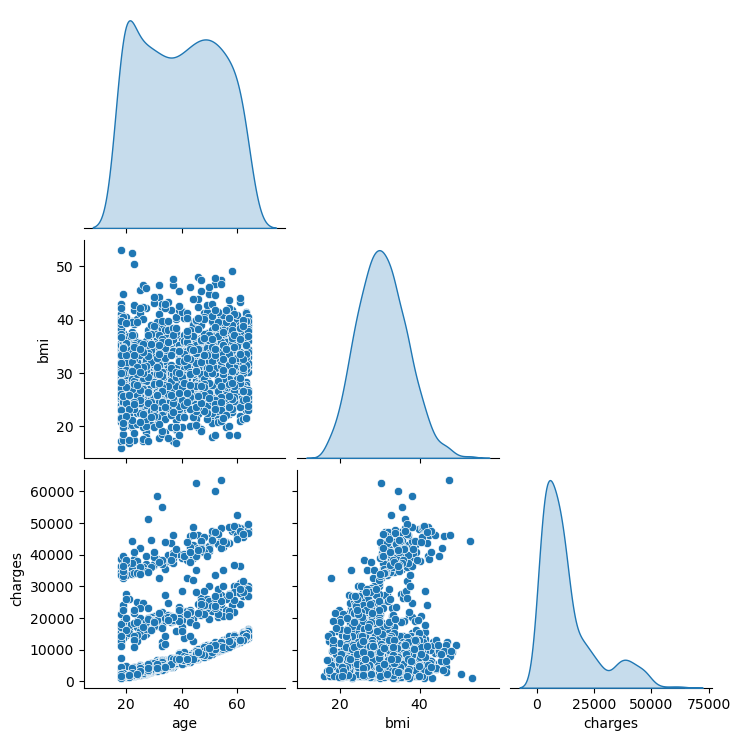

In [15]:
df_attr = df.iloc[:, [0,2,6]] # Select ‘age’, ‘bmi’ and ‘charges’ columns.

sns.pairplot(df_attr, diag_kind ="kde", corner = True); # pairplot"

Text(0.5, 1.0, 'Age vs Charges Seperated by smoker')

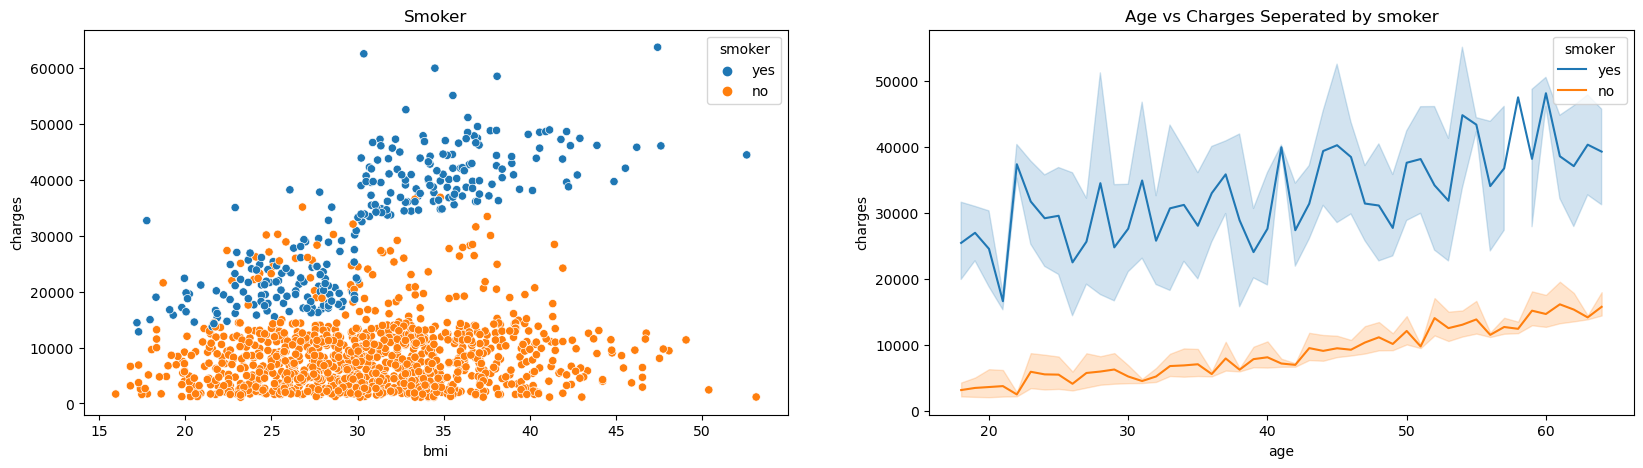

In [17]:
plt.figure(1, figsize=(20,5))

plt.subplot(1,2,1)
sns.scatterplot(data=df, x='bmi', y='charges', hue='smoker')
plt.title('Smoker')


plt.subplot(1,2,2)
sns.lineplot(x='age',y='charges',hue='smoker',data=df)
plt.title('Age vs Charges Seperated by smoker')

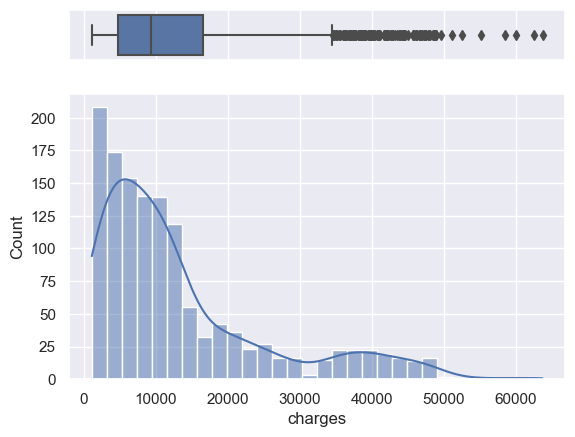

In [18]:
sns.set(style="darkgrid")
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(data=df,x='charges', ax=ax_box)
sns.histplot(data=df, x="charges", ax=ax_hist,kde=True)
ax_box.set(xlabel='')
plt.show()

### Log Transformation
The log transformation is a powerful technique used to stabilize the variance across a dataset, make the dataset more closely resemble a normal distribution, or to reduce the impact of outliers. It's especially useful when dealing with data that spans several orders of magnitude and can help in meeting the assumptions of various statistical tests and models that require normally distributed data.

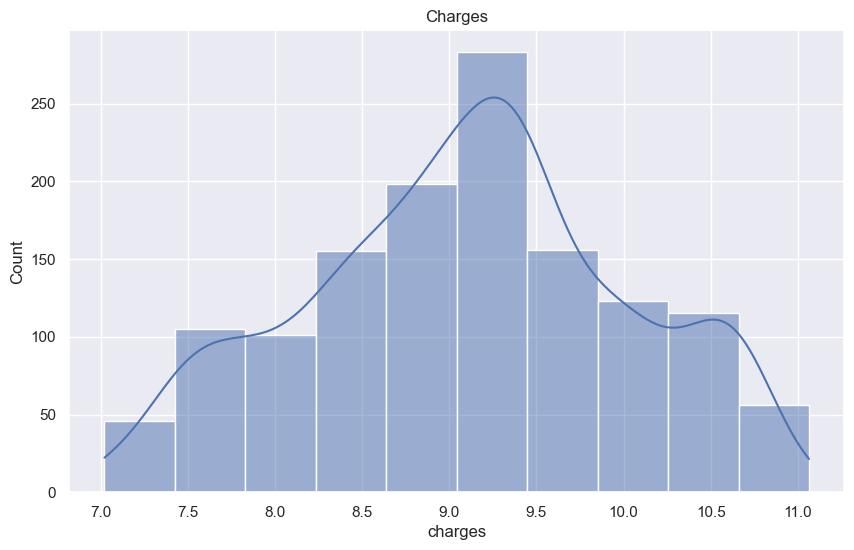

In [19]:
plt.figure(figsize=(10,6))
sns.histplot(np.log(df['charges']),kde=True,bins=10)
plt.title('Charges')
plt.show()

### QQ Plot After Log Transformation
When you apply a log transformation to your data and then create a QQ plot comparing the transformed data to a normal distribution, you're essentially checking to see if the log-transformed data is normally distributed.


Interpreting the QQ Plot
Straight Line: If the points on the QQ plot fall approximately along a straight line, it suggests that the log-transformed data follow a normal distribution.

Deviations from Linearity: Deviations from the straight line indicate departures from normality. For example, a curve that is concave up suggests a heavy-tailed distribution, while a concave down curve suggests a light-tailed distribution relative to the normal distribution.

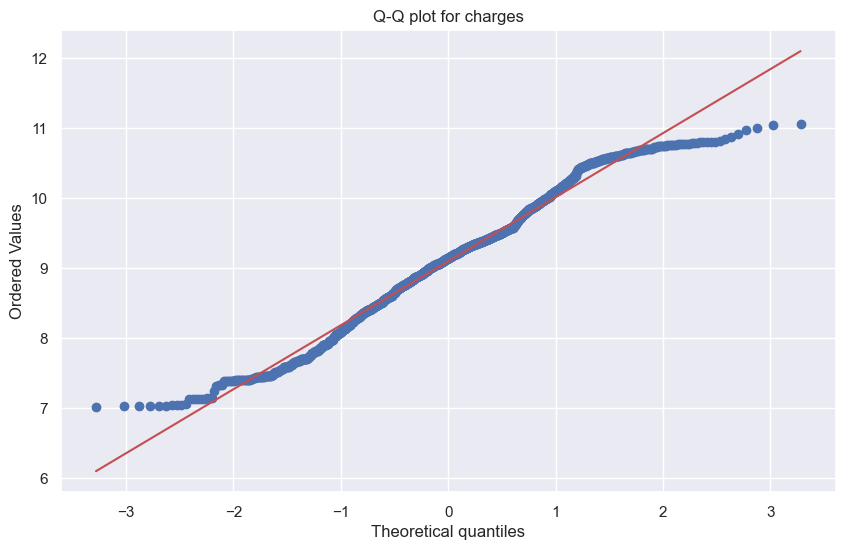

In [20]:
plt.figure(figsize=(10,6))
stats.probplot(df['charges'].apply(np.log), plot= plt, dist="norm")
plt.title('Q-Q plot for charges')
plt.show()

In [23]:
# outlier termination using IQR method 

def outlier_treatment_iqr(df):
    data = df.copy()
    q1 = data['charges'].quantile(0.25)
    q3 = data['charges'].quantile(0.75)

    iqr = q3 - q1

    lower_wisker = q1 - 1.5*iqr
    upper_wisker = q3 + 1.5*iqr

    treated_data = data[(data['charges'] <= upper_wisker) & (data['charges'] >= lower_wisker)]
    outlier_data = data[(data['charges'] > upper_wisker) | (data['charges'] < lower_wisker)]
    
    return (treated_data, outlier_data)

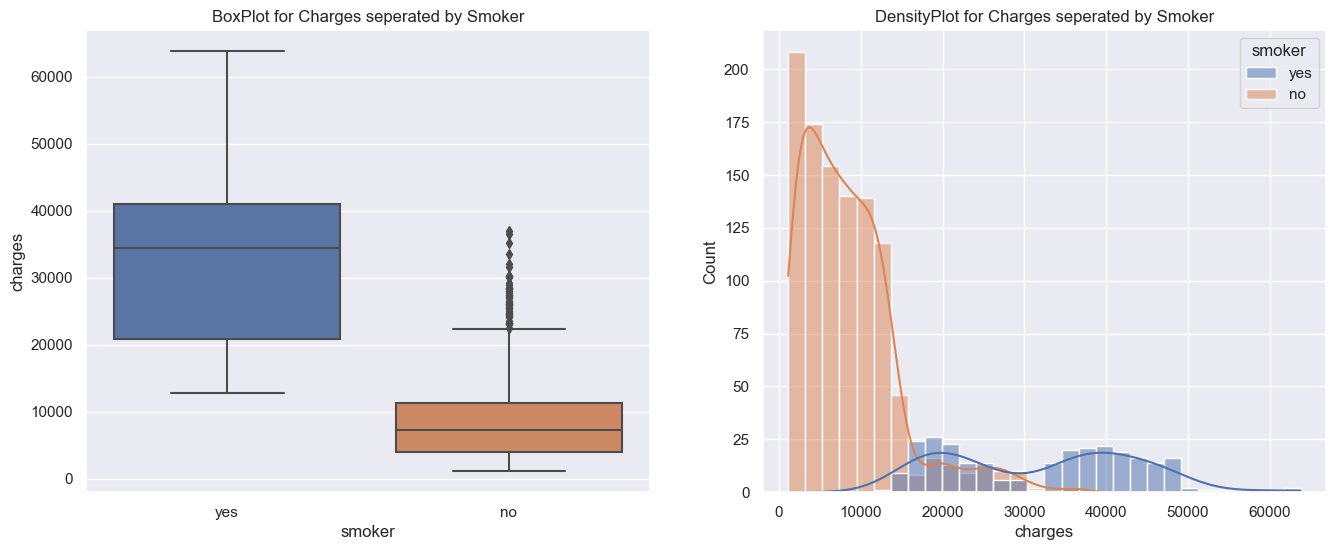

In [24]:

# let's first look at how smokers vs non smokers are effecting charges
plt.figure(1, figsize=(16,6))

plt.subplot(1,2,1)
sns.boxplot(data=df, x='smoker', y='charges')
plt.title('BoxPlot for Charges seperated by Smoker')

plt.subplot(1,2,2)
sns.histplot(data=df, x='charges', hue='smoker', kde=True)
plt.title('DensityPlot for Charges seperated by Smoker')
plt.show()


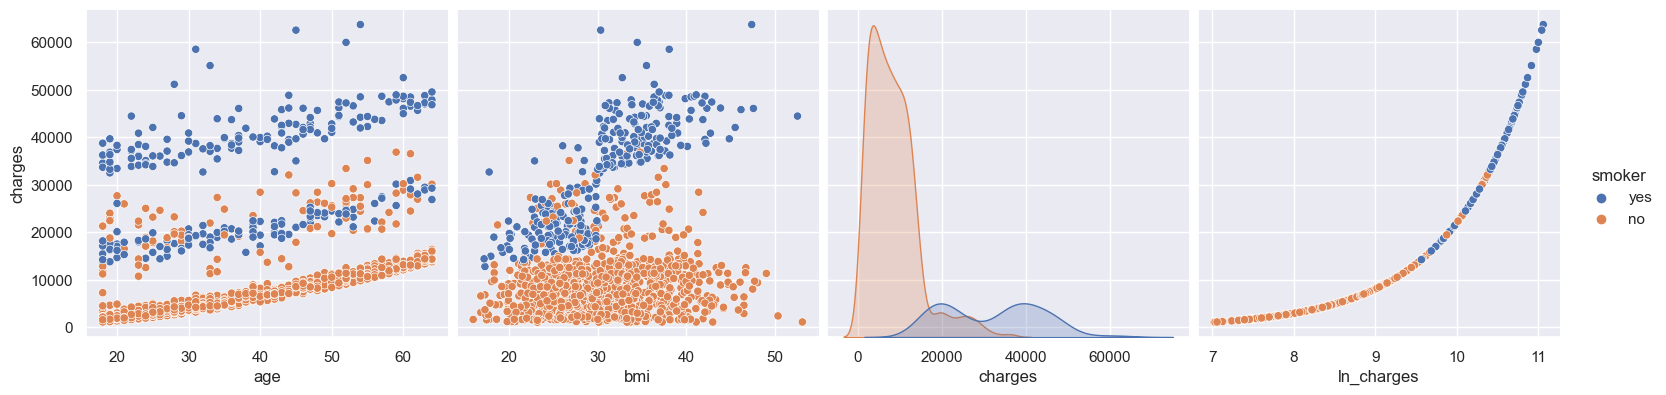

In [25]:
# Comparing each numeric variable seperated by smoker
sns.pairplot(df.drop('children', axis=1), y_vars=['charges'],hue='smoker', height=4)
plt.show()

**Observations:**

1. The median charge for smokers is higher than the median charge for nonsmokers, and the IQR for smokers is also wider. This suggests that smokers have a wider range of charges than nonsmokers, with some smokers having very high charges.

2. The box plot shows that there are a few outliers in both the smoker and nonsmoker groups. These outliers are likely individuals with very high medical insurance charges, perhaps due to a serious medical condition or a major accident.

3. The density plot shows the distribution of charges for smokers and nonsmokers in more detail. The plot shows that the distribution of charges for smokers is skewed to the right, with a longer tail at the high end. This means that there are more smokers with very high charges than nonsmokers with very high charges.

4. Overall, the box plot and density plot suggest that smokers tend to have higher medical insurance charges than nonsmokers.




### Hypothesis Testing: Smoking impacts the medical charges

* H0: The charges for individuals who smoke is either equal to or lower than that of non-smokers.

* H1: The charges for individuals who smoke is more than that of non-smokers.

significance level (alpha): 0.05 or 5%

We will go ahead with a one tailed T-test as it represents real world process better.

Outliers will be treated using the IQR method

Assumptions of t-test:

Both the groups should have same No of Datapoints
Both the groups should follow Normal Distributed
Both the groups should have Similar Variance

if we have more datapoints in one group we can downsample the larges group, and if the normality and variance assumption is not perfectly met, we can still proceed with the test as we have a large sample size.

Shape of both the group before downsampling
Smokers (274, 8)
Non-Smokers (1018, 8)


Shape of both the group after downsampling
Smokers (274, 8)
Non-Smokers (274, 8)


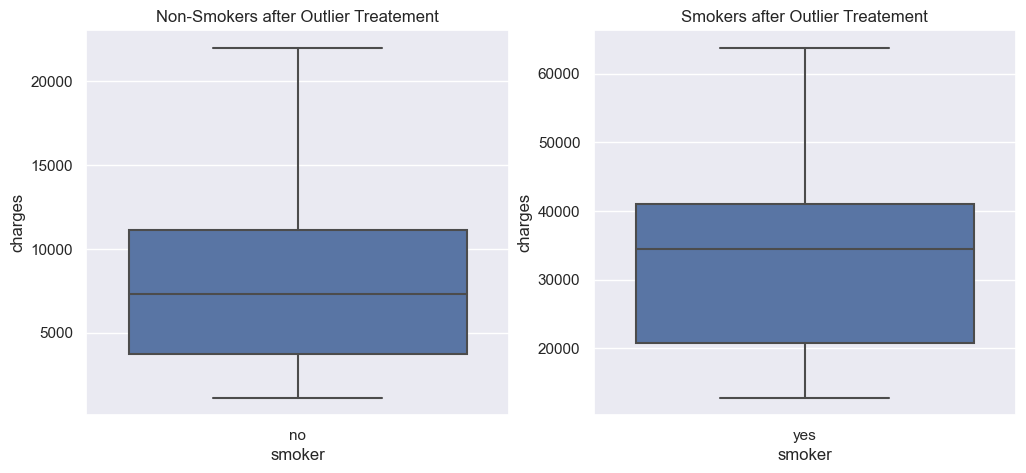

In [26]:
# let's create two groups, smokers and non-smokers
# we will create a new column named ln_charges, which will be the log of charges.

df['ln_charges'] = np.log(df['charges'])

smokers_df = df[df['smoker'] == 'yes']
non_smokers_df = df[df['smoker'] == 'no']

# From the above descriptive analysis we can see that we have a lot of outliers for non smokers
smokers_df, outliers_smokers_df = outlier_treatment_iqr(smokers_df)
non_smokers_df, outliers_non_smokers_df = outlier_treatment_iqr(non_smokers_df)

# let's check the shape of both the groups
print('Shape of both the group before downsampling')
print('Smokers', smokers_df.shape)
print('Non-Smokers', non_smokers_df.shape)
print('\n')


# downsample the non_smoker group as we have a lot more observations in non_smoker group 
non_smokers_df = non_smokers_df.sample(n=smokers_df.shape[0] , replace=False)
print('Shape of both the group after downsampling')

# shape of groups after downsampling
print('Smokers', smokers_df.shape)
print('Non-Smokers', non_smokers_df.shape)

# plotting to see the effect of outlier treatement
plt.figure(1, figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(data=non_smokers_df, x='smoker', y='charges')
plt.title('Non-Smokers after Outlier Treatement')
plt.subplot(1,2,2)
sns.boxplot(data=smokers_df, x='smoker', y='charges')
plt.title('Smokers after Outlier Treatement')

plt.show()

Text(0.5, 1.0, 'smokers')

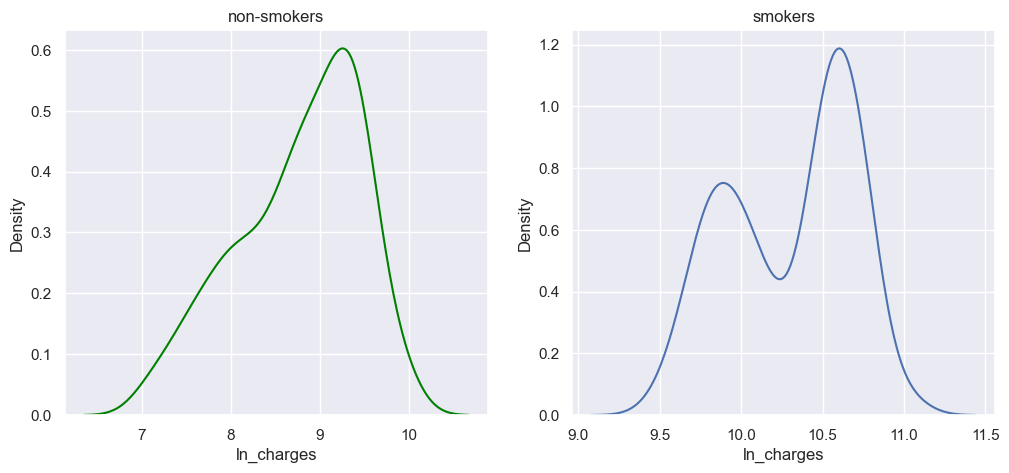

In [30]:
# 2. Assumption check - Both the groups should follow Normal Distributed
# investigating using kde plot

plt.figure(1, figsize=(12,5))

plt.subplot(1,2,1)
sns.kdeplot(data=non_smokers_df, x='ln_charges', color = 'Green')
plt.title('non-smokers')

plt.subplot(1,2,2)
sns.kdeplot(data=smokers_df, x='ln_charges')
plt.title('smokers')


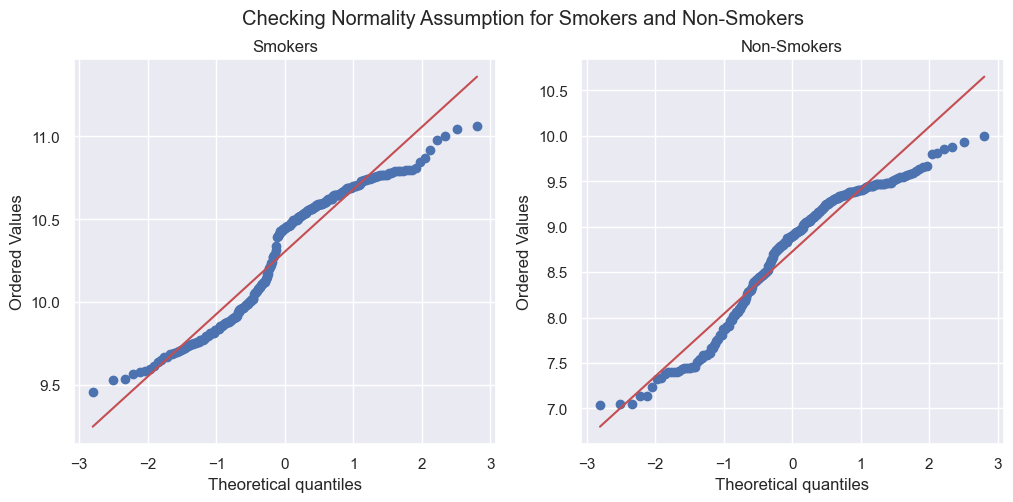

In [27]:
# 2. Assumption check - Both the groups should follow Normal Distributed
# we will perform this using qq plot

# checking for 
plt.figure(1, figsize=(12,5))
plt.subplot(1,2,1)
stats.probplot(smokers_df['ln_charges'], dist="norm", plot=plt)
plt.title('Smokers')

plt.subplot(1,2,2)
stats.probplot(non_smokers_df['ln_charges'], dist="norm", plot=plt)
plt.title('Non-Smokers')

plt.suptitle('Checking Normality Assumption for Smokers and Non-Smokers')
plt.show()

In [28]:
# performing the t-test

t_stat, p_val = stats.ttest_ind(smokers_df['ln_charges'], non_smokers_df['ln_charges'], equal_var=True)
print('T-Statistic:', t_stat)
print('P-value:', p_val)

T-Statistic: 32.50451471929944
P-value: 9.198306936222425e-130


### Reviewing and interpreting test results  <a id="TestResult"></a>

Null Hypothesis (H0): The charges for individuals who smoke are equal to or lower than that of non-smokers.

Alternative Hypothesis (H1): The charges for individuals who smoke are higher than that of non-smokers.

Significance Level (α): 0.05 or 5%

Analysis:

The calculated T-statistic of 32.654669 is very large, indicating a strong deviation from the null hypothesis. Additionally, the P-value of 3.8132703233651566e-117 is practically zero, meaning the probability of observing such a large T-statistic by chance alone is extremely low.

Since the P-value is less than the chosen significance level (α = 0.05), we reject the null hypothesis (H0) and accept the alternative hypothesis (H1).

Conclusion:

The analysis provides strong evidence that the average medical charges for individuals who smoke are significantly higher than those for non-smokers. This result supports the claim that smoking incurs greater healthcare costs.

To prove the BMI of females is different from that of males .

**Performing Two Tailed T-test**
- Null Hypothesis ( H0 ) - BMI for male and females are same.

- Alternate Hypothesis ( HA ) - BMI for males and females are different.

1. First Step -
Checking for basic assumpitons for the hypothesis

2. Second step-
Performing Two tailed t-test

3. Third step -
Checking for hypothesis result



##### Checking for basic assumptions
* Normality check
* Homogeneity of Variances


Homogeneity of Variances using Levene's test
Null Hypothesis(H0) - Homogenous Variance

Alternate Hypothesis(HA) - Non Homogenous variance

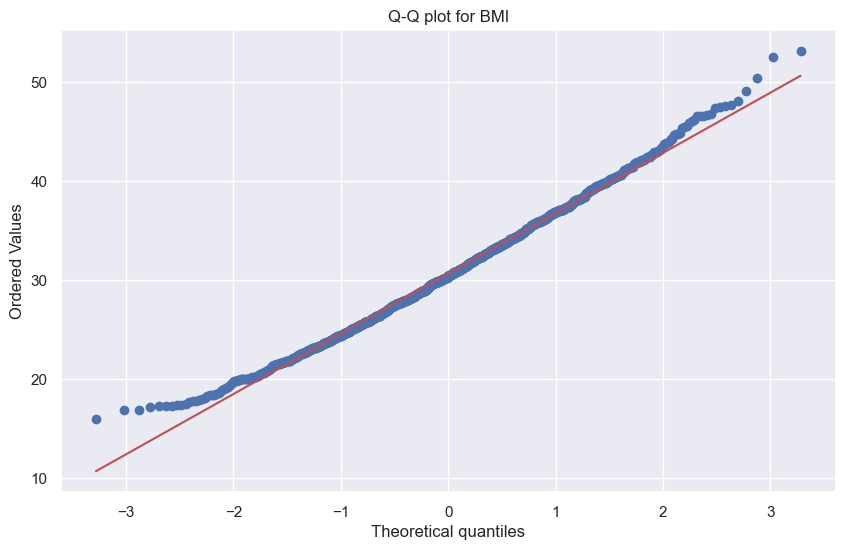

In [34]:
plt.figure(figsize=(10,6))
stats.probplot(df['bmi'], plot= plt, dist="norm")
plt.title('Q-Q plot for BMI')
plt.show()

### TESTS For Checking Normality



1. Shapiro-Wilk Test

The Shapiro-Wilk test evaluates whether a dataset significantly deviates from a normal distribution. It's widely used for its good power properties compared to other tests. In Python, you can use 'scipy.stats.shapiro".
2. Anderson-Darling Test

The Anderson-Darling test is another powerful test for normality that gives more weight to the tails of the distribution. It's used to check if a sample comes from a particular distribution. The test is available in Python via 'scipy . stats . anderson ".
3. Kolmogorov-Smirnov Test

The Kolmogorov-Smirnov test compares the empirical distribution of sample data with the expected normal distribution to assess the goodness of fit. It's not specifically designed for testing normality but can be adapted for this purpose. Use 'scipy . stats . kstest' for implementation.

In [45]:
# Shapiro-Wilk test
shapiro_smokers = stats.shapiro(smokers_df['ln_charges'])
shapiro_non_smokers = stats.shapiro(non_smokers_df['ln_charges'])

# Anderson-Darling test
anderson_smokers = stats.anderson(smokers_df['ln_charges'], dist='norm')
anderson_non_smokers = stats.anderson(non_smokers_df['ln_charges'], dist='norm')

# Kolmogorov-Smirnov test
ks_smokers = stats.kstest(smokers_df['ln_charges'], 'norm')
ks_non_smokers = stats.kstest(non_smokers_df['ln_charges'], 'norm')

(shapiro_smokers, shapiro_non_smokers), (anderson_smokers, anderson_non_smokers), (ks_smokers, ks_non_smokers)


# # Shapiro-Wilk Test Results
# print(f"Shapiro-Wilk Test Results:")
# print(f"  Smokers: Statistic = {shapiro_smokers:.2f}, P-value = {shapiro_smokers_p:.2e}")
# print(f"  Non-Smokers: Statistic = {shapiro_non_smokers:.2f}, P-value = {shapiro_non_smokers_p:.2e}\n")

# # Anderson-Darling Test Results
# print("Anderson-Darling Test Results:")
# print(f"  Smokers: Statistic = {anderson_smokers_stat:.2f}")
# print(f"  Non-Smokers: Statistic = {anderson_non_smokers_stat:.2f}\n")

# # Kolmogorov-Smirnov Test Results
# print("Kolmogorov-Smirnov Test Results:")
# print(f"  Smokers: Statistic = {ks_smokers_stat:.2f}, P-value = {ks_smokers_p:.2e}")
# print(f"  Non-Smokers: Statistic = {ks_non_smokers_stat:.2f}, P-value = {ks_non_smokers_p:.2e}")

((ShapiroResult(statistic=0.9288099408149719, pvalue=3.473258070041396e-10),
  ShapiroResult(statistic=0.9490416049957275, pvalue=3.6038453998799014e-08)),
 (AndersonResult(statistic=8.208974652175641, critical_values=array([0.568, 0.647, 0.776, 0.905, 1.077]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=10.304109568020342, scale=0.38752158774269824)
   success: True
   message: '`anderson` successfully fit the distribution to the data.'),
  AndersonResult(statistic=4.736232965141085, critical_values=array([0.568, 0.647, 0.776, 0.905, 1.077]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=8.693416089212919, scale=0.7086151328005115)
   success: True
   message: '`anderson` successfully fit the distribution to the data.')),
 (KstestResult(statistic=1.0, pvalue=0.0, statistic_location=9.459498985936145, statistic_sign=-1),
  KstestResult(statistic=0.9999999999989123, pvalue=0.0, statistic_loca

Shapiro-Wilk Test
- Smokers:
- Statistic: 0.929
- P-value: $3.47 \times 10^{-10}$
- Non-Smokers:
- Statistic: 0.949
- P-value: $3.60 \times 10^{-8}$

Interpretation: The Shapiro-Wilk test assesses the normality of a dataset. The closer the test statistic is to 1 , the more likely the data is normally distributed. For both smokers and nonsmokers, the statistics are relatively close to 1 , suggesting some level of normality. However, the extremely low p-values indicate strong evidence against the null hypothesis, meaning both datasets significantly deviate from a normal distribution.




Anderson-Darling Test
- Smokers:
- Statistic: 8.21
- Critical Values: $[0.568,0.647,0.776,0.905,1.077]$ for significance levels $[15 \%, 10 \%, 5 \%, 2.5 \%, 1 \%]$
- Non-Smokers:
- Statistic: 4.74
- Critical Values: $[0.568,0.647,0.776,0.905,1.077]$ for significance levels $[15 \%, 10 \%, 5 \%, 2.5 \%, 1 \%]$

Interpretation: The Anderson-Darling test is another measure of how well the data follows a particular distribution, in this case, a normal distribution. A higher test statistic indicates a less likely fit to the distribution. For both smokers and non-smokers, the statistics far exceed the critical values at conventional significance levels, indicating a deviation from normality.



Kolmogorov-Smirnov Test
- Smokers:
- Statistic: 1.0
- P-value: 0.0
- Non-Smokers:
- Statistic: 1.0
- P-value: 0.0

Interpretation: The Kolmogorov-Smirnov test compares the dataset to a normal distribution to assess goodness of fit. A statistic of 1.0 and a p-value of 0.0 for both groups suggest a complete deviation from the normal distribution. This is a strong indication that neither dataset is normally distributed.

# Q&A and Troubleshooting <a id="QA-and-Troubleshooting"></a>

#### Practical Exercise Solutions and Insights

- **Analyzing Insurance Dataset for Practical Exercises**:
  - [Insurance Claims EDA & Hypothesis Testing](https://www.kaggle.com/code/yogidsba/insurance-claims-eda-hypothesis-testing)
  - [Medical Cost Analysis](https://www.kaggle.com/code/raman007/medical-cost-analysis)
  - [Hypothesis Testing of Health Insurance Data](https://www.kaggle.com/code/jordanrich/hypothesis-testing-of-health-insurance-data/input)
  - [Hypothesis Testing for Beginners](https://www.kaggle.com/code/vinayakshanawad/hypothesis-testing-for-beginners)
  - [Hypothesis Test for Health Insurance Dataset](https://www.kaggle.com/code/yashgupta011/hypothesis-test-for-health-insurance-dataset/notebook)
  - [EDA, Hypothesis Testing, MLR Stats Report Style](https://www.kaggle.com/code/sashatarakanova/eda-hypothesis-testing-mlr-stats-report-style)
  - [EDA and Statistical Hypothesis Testing](https://www.kaggle.com/code/nazeernazeer/eda-and-statistical-hypothesis-testing/input)
  - [Insurance EDA & Hypothesis Testing](https://www.kaggle.com/code/mayank2896/insurance-eda-hypothesis-testing)
  - [EDA, Visualization, Regression & Hypothesis Testing](https://www.kaggle.com/code/dmitriyveselov/eda-visualization-regression-hypothesis-testing)
  - [Insurance EDA & Hypothesis Testing by Sameerudgirkar](https://www.kaggle.com/code/sameerudgirkar/insurance-eda-hypothesis-testing)
  - [Statistics for Data Scientists](https://www.kaggle.com/code/saurav9786/statistics-for-data-scientists)
  - [Python for Data 24: Hypothesis Testing](https://www.kaggle.com/code/hamelg/python-for-data-24-hypothesis-testing)

#### Datasets

- **Health Insurance Dataset for Practical Exercises**:
  - [Health Insurance Dataset](https://www.kaggle.com/datasets/shivadumnawar/health-insurance-dataset/data)

#### Additional Resources and Guides

- [What is Hypothesis Testing? - FreeCodeCamp](https://www.freecodecamp.org/news/what-is-hypothesis-testing/)
- [Running the Hypothesis Test in Practice - Ethan Weed](https://ethanweed.github.io/pythonbook/04.04-hypothesis-testing.html#running-the-hypothesis-test-in-practice)
- [How to Do a T-Test in Python - The Data Scientist](https://thedatascientist.com/how-to-do-a-t-test-in-python/)


# Assignment <a id="Assignment"></a>

### Assignment 1 

### Is BMI for Men different from Women?

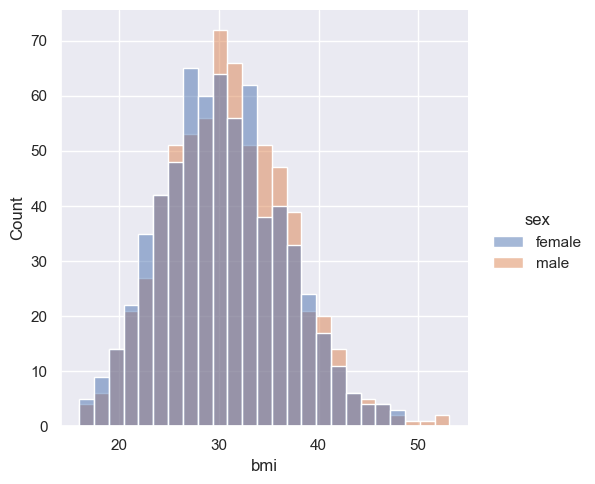

In [35]:
sns.displot(data =df, x = 'bmi', hue = 'sex')

In [36]:
def htResult(p_value):
    significance_level = 0.05
    if p_value <= significance_level: 
        print('Reject NULL HYPOTHESIS') 
    else: 
        print('Fail to Reject NULL HYPOTHESIS') 

In [37]:
# from scipy.stats import levene
from scipy import stats
males = df[df['sex']=='male']['bmi']
females = df[df['sex']=='female']['bmi']
stat,p = stats.levene(males,females)

In [38]:
print('P-value :',p)

P-value : 0.949963293424026


In [39]:
htResult(p)

Fail to Reject NULL HYPOTHESIS


We fail to reject null hypothesis, which means the variance is same.

In [40]:
# get statistic and p value
t_statistic_2, p_value_2 = stats.ttest_ind(males, females)
print("tstats = ",t_statistic_2, ", pvalue = ", p_value_2)

tstats =  1.696752635752224 , pvalue =  0.08997637178984932


In [41]:
st,p = stats.ttest_ind(males,females)
print('P-value :',p)

P-value : 0.08997637178984932


In [42]:
htResult(p)

Fail to Reject NULL HYPOTHESIS



We fail to reject null hypothesis, which means the bmi for females is not different from males.

In [43]:
df.head()

,age,sex,bmi,children,smoker,region,charges,ln_charges
0,19,female,27.900,0,yes,southwest,16884.92400,9.734176
1,18,male,33.770,1,no,southeast,1725.55230,7.453302
2,28,male,33.000,3,no,southeast,4449.46200,8.400538
3,33,male,22.705,0,no,northwest,21984.47061,9.998092
4,32,male,28.880,0,no,northwest,3866.85520,8.260197


In [44]:
print(df[df['smoker'] == 'yes'][['age', 'bmi']].head())
print(df[df['smoker'] == 'no'][['age', 'bmi']].head())


    age    bmi
0    19  27.90
11   62  26.29
14   27  42.13
19   30  35.30
23   34  31.92
   age     bmi
1   18  33.770
2   28  33.000
3   33  22.705
4   32  28.880
5   31  25.740


In [45]:
# Assuming missing values are handled and subsets have variability
smokers_corr = df[df['smoker'] == 'yes'][['age', 'bmi']].corr().iloc[0,1]
nonsmokers_corr = df[df['smoker'] == 'no'][['age', 'bmi']].corr().iloc[0,1]

# Use np.nan_to_num to convert nan to 0 for display purposes, if needed
smokers_corr = np.nan_to_num(smokers_corr)
nonsmokers_corr = np.nan_to_num(nonsmokers_corr)

print(f"The correlation coefficient between age and birth_weight for smokers is: {smokers_corr:.2f}")
print(f"The correlation coefficient between age and birth_weight for non-smokers is: {nonsmokers_corr:.2f}")


The correlation coefficient between age and birth_weight for smokers is: 0.06
The correlation coefficient between age and birth_weight for non-smokers is: 0.12
